In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import keras

2023-05-28 22:26:47.788515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 22:26:47.928598: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Source : https://colab.research.google.com/github/Rishit-dagli/Greenathon-Plant-AI/blob/main/notebooks/plant-diseases-training.ipynb#scrollTo=later-spectrum

data_dir = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)" # le chemin vers votre dataset
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

classes = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Blueberry___healthy",
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]


image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25
     

In [3]:
# Data Preprocessing
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=(image_size, image_size),
    batch_size=batch_size)


do_data_augmentation = False #au debut on essaye  sans l'augmentation de donnee
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=(image_size, image_size),
    batch_size=batch_size)

#categories = list(train_datagen.class_indices.keys())
#print(train_data.class_indices)

Found 17573 images belonging to 38 classes.
Found 70309 images belonging to 38 classes.


In [4]:
#Build the model
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False, #cela nous permet de supprimer FC layer et crer la notre par la suite
                                             input_shape = input_shape)

base_model.trainable = False

inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(38, 
                          activation="softmax")(x)

model = keras.Model(inputs = inputs, 
                    outputs = x, 
                    name="PlantVillage_MobileNet")

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(), 
                       'accuracy'])

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

2023-05-28 22:26:51.327081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


150/150 [==============================] - 81s 536ms/step - loss: 1.7897 - categorical_accuracy: 0.5381 - accuracy: 0.5381 - val_loss: 0.5948 - val_categorical_accuracy: 0.8934 - val_accuracy: 0.8934
Epoch 2/25
150/150 [==============================] - 88s 586ms/step - loss: 0.5947 - categorical_accuracy: 0.8413 - accuracy: 0.8413 - val_loss: 0.3414 - val_categorical_accuracy: 0.9409 - val_accuracy: 0.9409
Epoch 3/25
150/150 [==============================] - 90s 600ms/step - loss: 0.4205 - categorical_accuracy: 0.8875 - accuracy: 0.8875 - val_loss: 0.2209 - val_categorical_accuracy: 0.9597 - val_accuracy: 0.9597
Epoch 4/25
150/150 [==============================] - 92s 615ms/step - loss: 0.3457 - categorical_accuracy: 0.9027 - accuracy: 0.9027 - val_loss: 0.2074 - val_categorical_accuracy: 0.9563 - val_accuracy: 0.9563
Epoch 5/25
150/150 [==============================] - 96s 640ms/step - loss: 0.3069 - categorical_accuracy: 0.9115 - accuracy: 0.9115 - val_loss: 0.1696 - val_categori

In [6]:
!pip install opencv-python

1/1 [==============================] - 0s 24ms/step


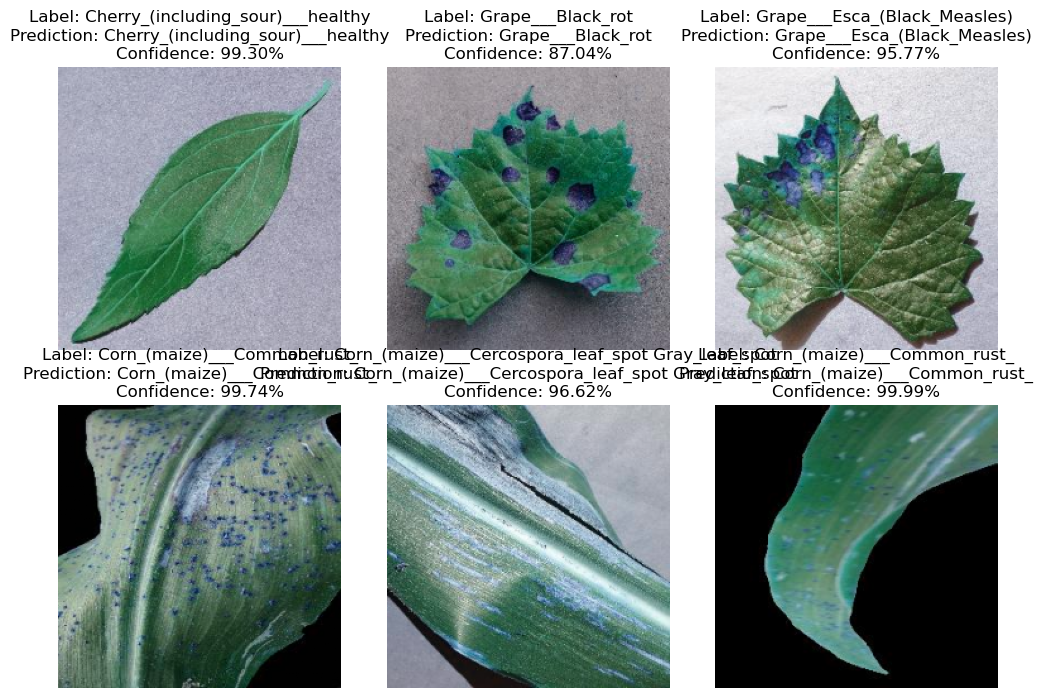

In [7]:
import cv2
import matplotlib.pyplot as plt

# Utility
import itertools
import random
from collections import Counter
from glob import iglob

def load_image(filename):
    img = cv2.imread(os.path.join(valid_dir, filename))
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img

def predict(img):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    return {classes[class_idx]: probabilities[class_idx]}

# Choisir 6 images aléatoirement
sample_size = 6
random_files = random.sample(validation_generator.filenames, sample_size)

# Créer la grille de sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Parcourir les images et les afficher dans la grille
for idx, filename in enumerate(random_files):
    row_idx = idx // 3
    col_idx = idx % 3
    
    # Charger et afficher l'image
    img = load_image(filename)
    axes[row_idx, col_idx].imshow(img)
    
    # Obtenir la prédiction
    prediction = predict(img)
    class_name = list(prediction.keys())[0]
    confidence = list(prediction.values())[0] * 100
    
    # Obtenir le label correct
    actual_label = os.path.split(filename)[0]
    
    # Afficher le label correct, la prédiction et la confiance
    axes[row_idx, col_idx].set_title(f"Label: {actual_label}\nPrediction: {class_name}\nConfidence: {confidence:.2f}%")
    axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.show()




In [8]:
import numpy as np

# Obtenez les prédictions du modèle sur l'ensemble de validation
predictions = model.predict(validation_generator)

# Convertissez les prédictions en étiquettes de classe prédites
predicted_labels = np.argmax(predictions, axis=1)

# Obtenez les étiquettes réelles de l'ensemble de validation
true_labels = validation_generator.classes

# Calculez l'exactitude (accuracy) pour chaque classe
class_accuracy = {}
for class_idx in range(len(validation_generator.class_indices)):
    class_samples = np.where(true_labels == class_idx)[0]
    class_predictions = predicted_labels[class_samples]
    class_accuracy[class_idx] = np.mean(class_predictions == class_idx)

# Affichez l'exactitude pour chaque classe
for class_idx, class_name in validation_generator.class_indices.items():
    print(f"Accuracy for class {class_name}: {class_accuracy[class_idx] * 100}%")


550/550 [==============================] - 204s 370ms/step


KeyError: 'Apple___Apple_scab'

In [ ]:
tf.saved_model.save(model, './saved_model')

tf.saved_model.save(model, './saved_model')

In [ ]:
saved_model_dir = './saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# Paramètres de conversion
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Convertir le modèle en format TFLite
tflite_model = converter.convert()

# Enregistrer le modèle TFLite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

vrai=[]
a='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___Bacterial_spot/0e272a6e-9a6f-49d7-a599-4a60ac4bdb74___Rut._Bact.S 1548.JPG'

image = Image.open(a)
image = image.resize((224, 224))  # Redimensionner l'image à la taille d'entrée du modèle
image = np.array(image) / 255.0  # Normaliser les valeurs de pixel entre 0 et 1
image = np.expand_dims(image, axis=0)  # Ajouter une dimension de lot (batch dimension)

# Faire la prédiction
predictions = model.predict(image)
predicted_class = np.argmax(predictions)
print(predicted_class)
resultat=classes[predicted_class]
print(resultat)




In [ ]:
model.summary()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(validation_generator, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(x_test)
print(classification_report(Y_test, y_pred))
